In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [23]:
df = pd.read_csv('196genes_635021f405530.csv')

In [24]:
df.head(5)

,gene,1,2,3,4,5,6,7
0,SEC8,0.190,0.186,0.089,0.266,0.306,0.162,0.454
1,YPR147C,0.149,0.152,0.094,0.324,0.311,0.236,0.373
2,ITC1,0.117,0.282,0.128,0.284,0.196,0.154,0.444
3,PAU13,0.144,0.248,0.017,0.151,0.235,0.299,0.459
4,HHF2,0.053,0.105,0.165,0.289,0.254,0.221,0.334


In [25]:
X = df[df.columns[1:]].to_numpy(dtype=np.float32)

scaler = StandardScaler(with_mean=False, with_std=True)
X = scaler.fit_transform(X)

y = df[df.columns[0]].to_numpy()

t = list(map(int, list(df)[1:]))

print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (196, 7) float32
y: (196,) object


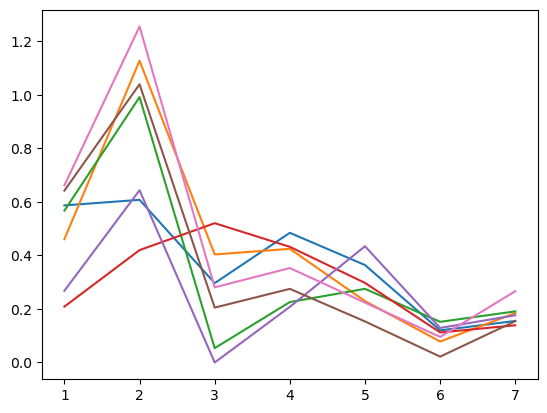

In [26]:
for x in t:
    plt.plot(t, X[x, :])

In [27]:
# Run K-means for a set of k
from tqdm import tqdm

distortions = []
models = []
K = list(range(1, 10 + 1))
for k in tqdm(K):
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(X)
    models.append(model)
    distortions.append(model.inertia_)

100%|██████████| 10/10 [00:00<00:00, 287.41it/s]


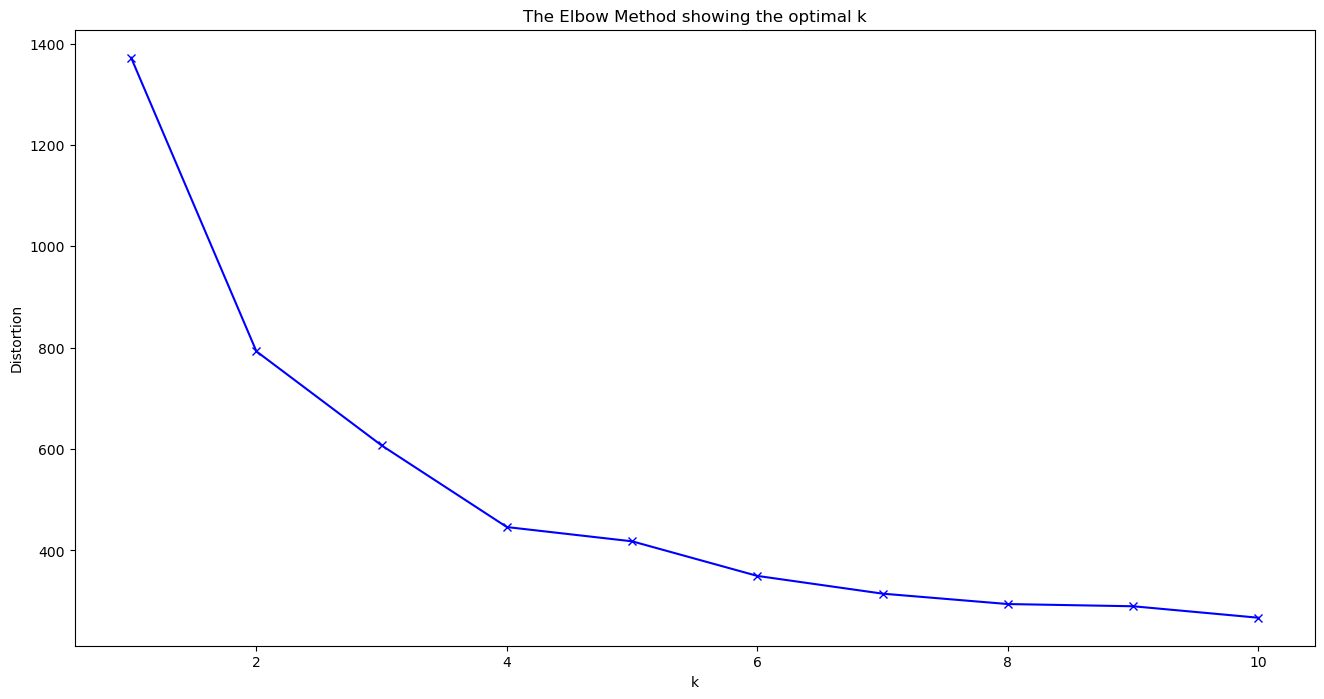

In [28]:
# Plotting the distortions of K-Means
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

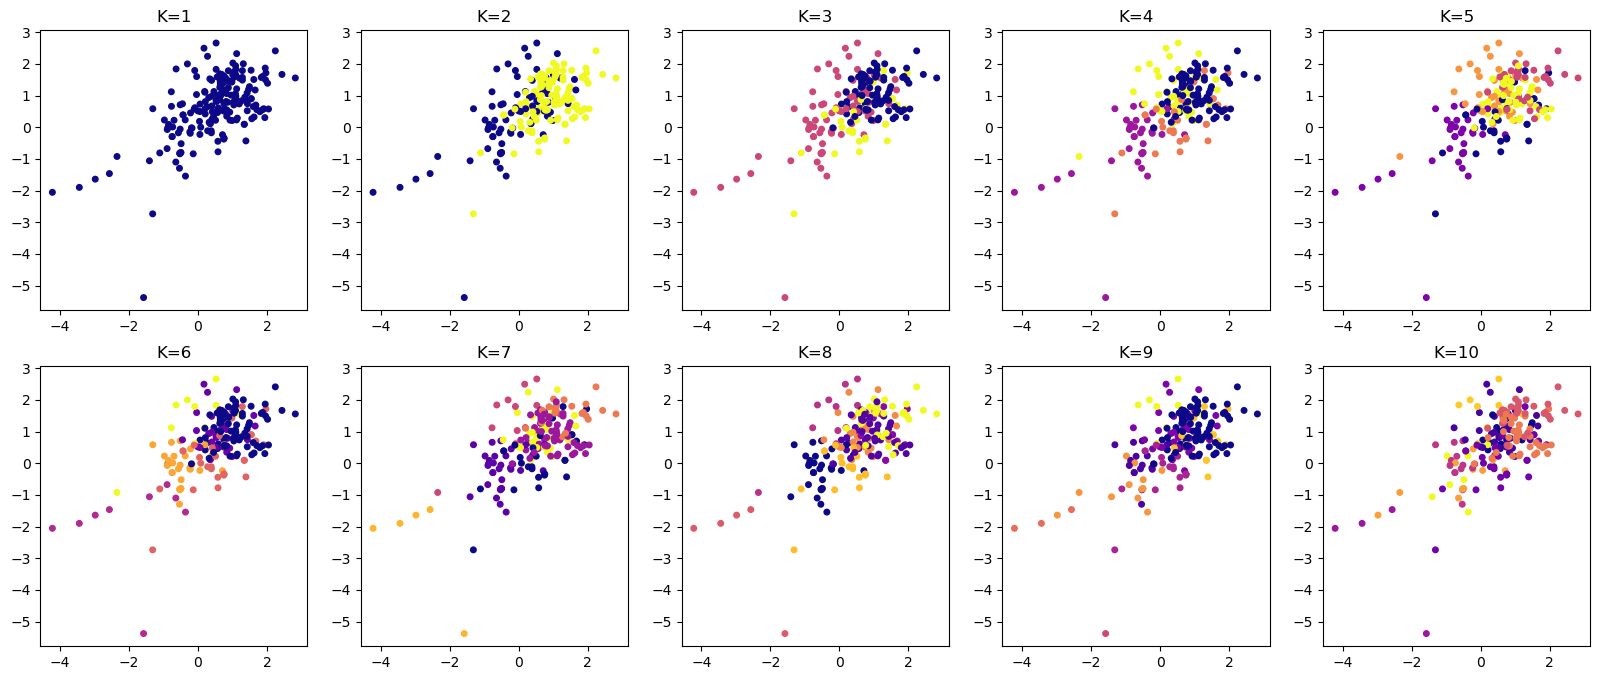

In [29]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax = [*ax[0], *ax[1]]

for k, model, ax in zip(K, models, ax):
    y_pred = model.predict(X)
    ax.set_title(f'K={k}')
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=16, cmap=mpl.colormaps['plasma'])

In [30]:
k_opt = 5
m_opt = models[k_opt - 1]

y_opt = m_opt.predict(X)

In [31]:
print(y_opt)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 1 1
 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 3 1 3 3 3 1 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 3 1 3 3 1 3 3 1 1 1 1 1 1 1 3 1 3 1 1 1 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 2 4 4 4 2 4 2 2 2 2 4 4 2 4 4 4 4 2
 2 4 4 2 2 2 2 4 2 4 2 4 2 2 2 2 4 4 2 2 4 2 2 4 4 4 4 4 2 4 4 4 2 2 4 2 4
 4 4 4 4 2 4 2 2 4 4 4]


In [32]:
out = {i: [] for i in range(k_opt)}

In [33]:
for i, (group, gene) in enumerate(zip(y_opt, y)):
    out[group].append((gene, i))

In [34]:
print(out)

{0: [('RRP12', 97), ('AAH1', 98), ('HAS1', 99), ('SAM1', 100), ('GPP1', 101), ('YGR160W', 102), ('UTP5', 103), ('HAS1', 104), ('AAH1', 105), ('YGR160W', 106), ('MKC7', 107), ('GPP1', 108), ('SAM1', 109), ('RLP7', 110), ('DBF2', 111), ('UTP10', 112), ('FPR4', 113), ('DIP2', 114), ('ILV5', 115), ('YNL303W', 116), ('MAK21', 117), ('UTP15', 118), ('YNL060C', 119), ('KRE33', 121), ('ARB1', 122), ('MES1', 123), ('RRP9', 125), ('TEF4', 126), ('NEW1', 127), ('MAK16', 128), ('NHP2', 129)], 1: [('MLS1', 15), ('IDP2', 16), ('ACS1', 18), ('FBP1', 19), ('SFC1', 20), ('PCK1', 21), ('HXT5', 22), ('YJL045W', 23), ('FAT3', 24), ('SIP4', 25), ('YAT2', 26), ('ADY2', 27), ('YPS5', 28), ('BOP2', 29), ('GPX1', 35), ('NQM1', 36), ('TMA10', 48), ('COX5A', 54), ('COX13', 56), ('AAC1', 60), ('NORF 54', 61), ('BTN2', 65), ('ECM38', 68), ('COX5A', 69), ('GDB1', 76), ('ECM4', 79), ('ATP20', 82), ('EIS1', 83), ('ATP3', 84), ('GSM1', 85), ('COX13', 86), ('PFK26', 87), ('AGP1', 88), ('YOL153C', 90), ('NDI1', 92), ('Y

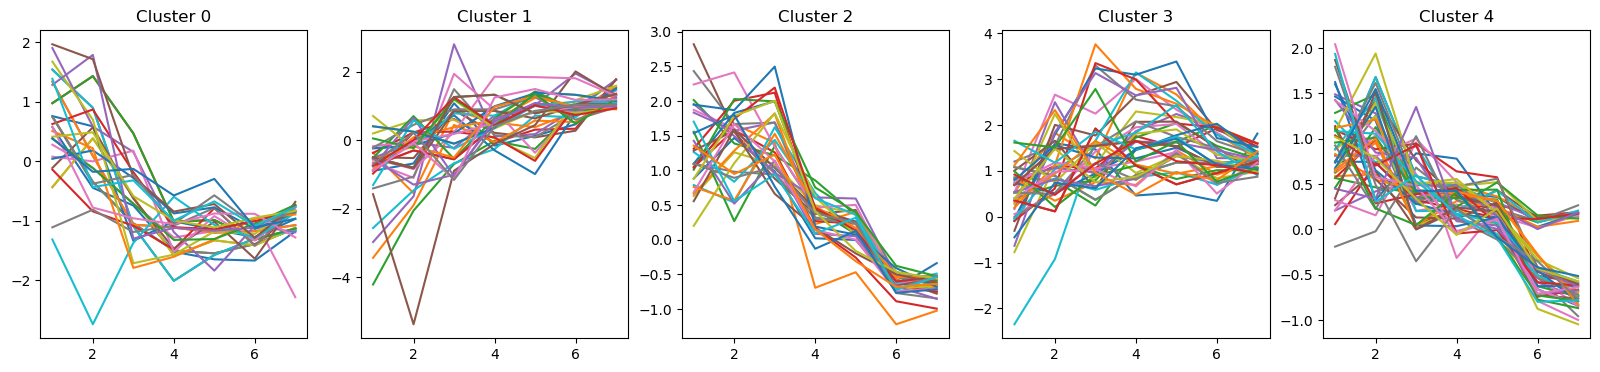

In [44]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))

for ax, (k, genes) in zip(ax, out.items()):
    ax.set_title(f'Cluster {k}')
    for _, gene in genes:
        ax.plot(t, X[gene, :])